<a href="https://colab.research.google.com/github/jihyunjeongme/deeplearning-tensflow-3min/blob/master/%5B3%EB%B6%84_%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_6%EC%9E%A5_%ED%97%AC%EB%A1%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
# MNIST의 손글씨 이미지는 28 x 28픽셀
# 784개의 특징으로 이루어져 있음.
# 레이블은 0부터 9까지 이니 10개의 분류로 나눔
# None으로 넣어주면 한 번에 학습할 개수를 계속 바꿔가면서 실험해볼려는 경우 

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [4]:
# 784(입력, 특징 개수) -> 256 (첫 번째 은닉층 뉴런 개수) -> 256 (두 번째 은닉층 뉴런 개수)
# -> 10 (결괏값 0-9 분류 개수)



# tf.matmul 함수를 이용하여 각 계층으로 들어오는 입력값에 각각의 가중치를 곱하고
# tf.nn.relu 함수를 이용하여 활성화 함수로 ReLU를 사용하는 신경망 계층을 만듭니다.
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

# 표준 편차가 0.01인 정규분포를 가지는 임의의 값으로 뉴런(변수)을 초기화시킵니다.
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))

# 마지막 계층인 model 텐서에 W3 변수를 곱함으로써 요소 10개짜리 배열이 출력됩니다.
# 10개의 요소는 0부터 9까지의 숫자를 나타내며, 가장 큰 값을 가진 인덱스가 예측 결과에
# 가까운 숫자입니다.
# 출력층에는 보통 활성화 함수를 사용하지 않습니다.

model = tf.matmul(L2, W3)


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# tf.nn.softmax_cross_entroypy_with_logits_v2 함수를 이용하여
# 각 이미지에 대한 손실값을 구하고
# tf.reduce_mean 함수를 이용해 미니배치의 편균 손실값을 구함.
# tf.train.AdamOptimizer 함수를 사용하여 손실값을 최소화하는 최적화를 수행

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
                                         logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [0]:
# 앞에서 구성한 신경 모델을 초기화하고 학습을 진행할 세션을 시작

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
# 실제 학습진행
# 학습에 미니배치 사용(데이터가 수만 개로 매우크므로)
# 미니배치 크기 100
# 학습 데이터의 총 개수인 minist.train.num_examples를 배치 크기로 나눠
# 미니배치가 총 몇 개인지를 저장해둡니다.
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [11]:
# MNIST 데이터 전체를 학습하는 일을 총 15번 반보갑니다(학습 데이터 전체를 한 바퀴 도는 것)
# 을 에포크(epoch)라고 합니다.

# 반복문에서 미니배치의 총 개수만큼 반복하여 학습니다.
for epoch in range(15):
  total_cost = 0
  
  # mnist.train.next_batch(batch_size)함수를 이용해 학습할 데이터를
  # 배치 크기만큼 가져온 뒤, 입력값인 이미지 데이터는 batch_xs에, 
  # 출력값인 레이블 데이터는 batch_ys에 저장합니다.
  
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    
    
    # sess.run을 이용하여 최적화시키고 손실값을 가져와서 저장합니다.
    _, cost_val = sess.run([optimizer,cost],

    # feed_dict 매개변수에 입력값 X와 예측을 평가할 실제 레이블값 Y에 사용할 데이터를 넣어줌                       
    feed_dict={X: batch_xs, Y: batch_ys})
    
    # 손실값 저장한 다음, 한 세대의 학습이 끝나면 학습한 세대의 평균 손실값을 출력
    total_cost += cost_val
    
  print('Epoch:', '%04d' % (epoch + 1),
       'Avg. cost = ', '{:.3f}'.format(total_cost / total_batch))
  
print('최적화 완료!')

Epoch: 0001 Avg. cost =  0.014
Epoch: 0002 Avg. cost =  0.007
Epoch: 0003 Avg. cost =  0.009
Epoch: 0004 Avg. cost =  0.008
Epoch: 0005 Avg. cost =  0.008
Epoch: 0006 Avg. cost =  0.010
Epoch: 0007 Avg. cost =  0.005
Epoch: 0008 Avg. cost =  0.004
Epoch: 0009 Avg. cost =  0.010
Epoch: 0010 Avg. cost =  0.008
Epoch: 0011 Avg. cost =  0.004
Epoch: 0012 Avg. cost =  0.008
Epoch: 0013 Avg. cost =  0.004
Epoch: 0014 Avg. cost =  0.010
Epoch: 0015 Avg. cost =  0.007
최적화 완료!


In [19]:
# 학습이 잘 되었는지 결과를 한번 출력
# 예측결과인 model의 값과 실제 레이블인 Y의 값을 비교

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y,1))

print(is_correct)
# 예측한 결괏값은 원-핫 인코딩 형식이며 각 인덱스에 해당하는 값은 다음처럼 해당 숫자가
# 얼마나 해당 인덱스와 관련이 높은가를 나타냅니다.
# 즉, 값이 가장 큰 인덱스(이 예에서는 7)가 가장 근접한 예측 결과라는 말이겠죠?
# (단, 이것은 손실값을 softmax_cross_entropy_with_logits_v2를 이용해 구했기 때문
# 초깃값이나 예측 모델, 손실값을 구하는 방식 등에 따라 결과가 달라질 수 있음.

Tensor("Equal_3:0", shape=(?,), dtype=bool)


In [0]:
# tf.cast를 이용해 is_correct를 0과 1로 변환. 
# 변환한 값들을 tf.reduce_mean을 이용해 평균을 내면 그것이 바로 정확도(확률)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [16]:
# 테스트 데이터를 다루는 객체인 mnist.test를 이용해 테스트 이미지와 레이블 데이터를 넣어
# accuracy를 계산

print('정확도:', sess.run(accuracy, 
                      feed_dict={X: mnist.test.images,
                                Y: mnist.test.labels}))

정확도: 0.9808


# 드롭아웃 기능을 사용

In [0]:
# 드롭아웃: 학습 시 전체 신경망 중 일부만을 사용하도록 하는 것
# 즉, 학습 단계마다 일부 뉴런을 제거(사용하지 않도록)함으로써,
# 일부 특징이 특정 뉴런들에 고정되는 것을 막아 가중치의 균형을 잡도록 하여 과적합을 방지합니다.

In [56]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/",one_hot=True)

# MNIST의 손글씨 이미지는 28 x 28픽셀
# 784개의 특징으로 이루어져 있음.
# 레이블은 0부터 9까지 이니 10개의 분류로 나눔
# None으로 넣어주면 한 번에 학습할 개수를 계속 바꿔가면서 실험해볼려는 경우 

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)


# 784(입력, 특징 개수) -> 256 (첫 번째 은닉층 뉴런 개수) -> 256 (두 번째 은닉층 뉴런 개수)
# -> 10 (결괏값 0-9 분류 개수)

# tf.matmul 함수를 이용하여 각 계층으로 들어오는 입력값에 각각의 가중치를 곱하고
# tf.nn.relu 함수를 이용하여 활성화 함수로 ReLU를 사용하는 신경망 계층을 만듭니다.
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)


W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

# 표준 편차가 0.01인 정규분포를 가지는 임의의 값으로 뉴런(변수)을 초기화시킵니다.
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))

# 마지막 계층인 model 텐서에 W3 변수를 곱함으로써 요소 10개짜리 배열이 출력됩니다.
# 10개의 요소는 0부터 9까지의 숫자를 나타내며, 가장 큰 값을 가진 인덱스가 예측 결과에
# 가까운 숫자입니다.
# 출력층에는 보통 활성화 함수를 사용하지 않습니다.

model = tf.matmul(L2, W3)


# tf.nn.softmax_cross_entroypy_with_logits_v2 함수를 이용하여
# 각 이미지에 대한 손실값을 구하고
# tf.reduce_mean 함수를 이용해 미니배치의 편균 손실값을 구함.
# tf.train.AdamOptimizer 함수를 사용하여 손실값을 최소화하는 최적화를 수행

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
                                         logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

# 앞에서 구성한 신경 모델을 초기화하고 학습을 진행할 세션을 시작

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 실제 학습진행
# 학습에 미니배치 사용(데이터가 수만 개로 매우크므로)
# 미니배치 크기 100
# 학습 데이터의 총 개수인 minist.train.num_examples를 배치 크기로 나눠
# 미니배치가 총 몇 개인지를 저장해둡니다.
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# MNIST 데이터 전체를 학습하는 일을 총 15번 반보갑니다(학습 데이터 전체를 한 바퀴 도는 것)
# 을 에포크(epoch)라고 합니다.

# 반복문에서 미니배치의 총 개수만큼 반복하여 학습니다.
for epoch in range(30):
  total_cost = 0
  
  # mnist.train.next_batch(batch_size)함수를 이용해 학습할 데이터를
  # 배치 크기만큼 가져온 뒤, 입력값인 이미지 데이터는 batch_xs에, 
  # 출력값인 레이블 데이터는 batch_ys에 저장합니다.
  
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    
    
    # sess.run을 이용하여 최적화시키고 손실값을 가져와서 저장합니다.
    _, cost_val = sess.run([optimizer,cost],

    # feed_dict 매개변수에 입력값 X와 예측을 평가할 실제 레이블값 Y에 사용할 데이터를 넣어줌                       
      feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
    
    # 손실값 저장한 다음, 한 세대의 학습이 끝나면 학습한 세대의 평균 손실값을 출력
    total_cost += cost_val
    
  print('Epoch:', '%04d' % (epoch + 1),
       'Avg. cost = ', '{:.3f}'.format(total_cost / total_batch))
  
print('최적화 완료!')
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y,1))

# tf.cast를 이용해 is_correct를 0과 1로 변환. 
# 변환한 값들을 tf.reduce_mean을 이용해 평균을 내면 그것이 바로 정확도(확률)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# 테스트 데이터를 다루는 객체인 mnist.test를 이용해 테스트 이미지와 레이블 데이터를 넣어
# accuracy를 계산

print('정확도:', sess.run(accuracy, 
                      feed_dict={X: mnist.test.images,
                                Y: mnist.test.labels,
                                keep_prob: 1}))



Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost =  0.431
Epoch: 0002 Avg. cost =  0.166
Epoch: 0003 Avg. cost =  0.113
Epoch: 0004 Avg. cost =  0.087
Epoch: 0005 Avg. cost =  0.074
Epoch: 0006 Avg. cost =  0.059
Epoch: 0007 Avg. cost =  0.054
Epoch: 0008 Avg. cost =  0.045
Epoch: 0009 Avg. cost =  0.041
Epoch: 0010 Avg. cost =  0.037
Epoch: 0011 Avg. cost =  0.034
Epoch: 0012 Avg. cost =  0.029
Epoch: 0013 Avg. cost =  0.028
Epoch: 0014 Avg. cost =  0.029
Epoch: 0015 Avg. cost =  0.024
Epoch: 0016 Avg. cost =  0.024
Epoch: 0017 Avg. cost =  0.024
Epoch: 0018 Avg. cost =  0.021
Epoch: 0019 Avg. cost =  0.021
Epoch: 0020 Avg. cost =  0.021
Epoch: 0021 Avg. cost =  0.018
Epoch: 0022 Avg. cost =  0.020
Epoch: 0023 Avg. cost =  0.018
Epoch: 0024 Avg. cost =  0.018
Epoch: 0025 Avg. cost =  0.015
Epoch: 0026 Avg. cost =

# 6-3 matplotlib

In [0]:
# matplotlib의 pyplot 모듈을 임포트

import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

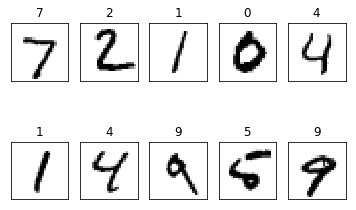

In [58]:
# 테스트 데이터를 이용해 예측 모델을 실행하고 결괏값을 labels에 저장합니다.
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})
# 손 글씨를 출력할 그래프를 준비
fig = plt.figure()

# 테스트 데이터의 첫 번쨰부터 열 번쨰까지의 이미지와 예측한 값을 출력합니다.
for i in range(10):
    # 2행 5열의 그래프를 만들고, i + 1번쨰에 숫자 이미지를 출력합니다.
    subplot = fig.add_subplot(2, 5, i + 1)
    
    # 이미지를 깨끗하게 출력하기 위해 x와 y의 눈금을 출력하지 않습니다.
    subplot.set_xticks([])
    subplot.set_yticks([])

    # 출력한 이미지 위에 예측한 숫자를 출력합니다.
    # np.argmax는 tf.argmax와 같은 가닝의 함수입니다.
    # 결괏값인 labels의 i번째 요소가 원-핫 인코딩 형식으로 되어 있으므로,
    # 해당 배열에서 가장 높은 값을 가진 인덱스를 예측한 숫자로 출력합니다.
    subplot.set_title('%d' % np.argmax(labels[i]))
    
    # 1차원 배열로 되어 있는 1번쨰 이미지 데이터를 
    # 28 x 28 형식의 2차원 배열로 변형하여 이미지 형태로 출력합니다.
    # cmap 파라미터를 통해 이미지를 그레이스케일로 출력합니다.
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

# 그래프를 화면에 표시
plt.show()